<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-diabetes-com-tecnicas-de-Machine-Learning/blob/main/Prevendo_diabetes_com_t%C3%A9cnicas_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo `diabetes` com técnicas de  _Machine Learning_**

---



In [1]:
# importando o conjunto de dados
!wget 'https://raw.githubusercontent.com/FGalvao77/datasets/main/diabetes.csv'

--2022-01-12 23:38:59--  https://raw.githubusercontent.com/FGalvao77/datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2022-01-12 23:38:59 (16.5 MB/s) - ‘diabetes.csv.2’ saved [23873/23873]



In [2]:
# visualizando o conjunto de dados
!head diabetes.csv

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [3]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [4]:
# biblioteca para manipulação de dados
import pandas as pd

In [5]:
# instanciando o conjunto de dados no objeto "diabetes"
diabetes = pd.read_csv('https://raw.githubusercontent.com/FGalvao77/datasets/main/diabetes.csv')

In [6]:
# visualizando o tipo do objeto
type(diabetes)

pandas.core.frame.DataFrame

In [7]:
# visualizando as 5 primeiras linhas do objeto "diabetes"
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [194]:
# dimensão do conjunto de dados
diabetes.shape  # linhas e colunas

(768, 9)

In [58]:
# data_modeling = diabetes.sample(frac=0.8, random_state=786)
# data_test = diabetes.drop(data_modeling.index)

# data_modeling.reset_index(drop=True, inplace=True)
# data_test.reset_index(drop=True, inplace=True)


# print('Dados para modelagem:' + str(data_modeling.shape))
# print('Dados para teste do modelo:' + str(data_test.shape))

## **Análise Exploratória dos Dados (EDA - Exploratory Data Analysis)**

In [195]:
# nome dos atributos
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [196]:
# informações gerais
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# estatística descritiva 
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# realizando a transposição da exibição das informações com a função ".T"
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
# verificando se há valores nulos
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> Neste conjunto de dados específico, todos os valores ausentes receberam o `0 (zero)` como valor, isso não é bom para a autenticidade do conjunto de dados. <br><br> Portanto, adotaremos a seguinte estratégia:
- primeiro substituiremos o valor **0** pelo valor **NaN** e, 
- em seguida, iniciaremos o processo de imputação dos valores para substituição dos campos com _NaN_.

**Para manipulação e demais tratamentos, iremos aplicar todas essas etapas em uma cópia do conjunto de dados**

In [14]:
# criando uma cópia do conjunto de dados
diabetes_copy = diabetes.copy(deep=True)

# visualizando as 5 primeiras linhas
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# biblioteca para modelagem matemática
import numpy as np

Aplicaremos a substituição do **0 (zero)** por _NaN_ somente nos atributos:
- `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI`.

In [16]:
# imputando valores "NaN" nos campos com valores 0 (zero) nos atributos de interesses
diabetes_copy[['Glucose', 'BloodPressure', 
               'SkinThickness', 'Insulin', 
               'BMI']] = diabetes_copy[['Glucose', 'BloodPressure', 
                                        'SkinThickness', 'Insulin',
                                        'BMI']].replace(0, np.NaN)  

# realizando a contagem de NaN's
print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


> Substituímos os zeros pelos valores NaN, com isso, estamos tentando manter a autenticidade do conjunto de dados, bem como ter uma melhor abordagem de imputação, ou seja, aplicar valores como a _moda_, _média_ e _mediana_ de cada coluna ao valor nulo das respectivas colunas.

## **Visualização de Dados (Data Visualization)**

**Podemos utilizar a biblioteca `missingno` que fornece recurso visual para detecção de valores nulos e/ou faltantes no conjunto de dados.**

In [17]:
# importando a biblioteca
import missingno as msno

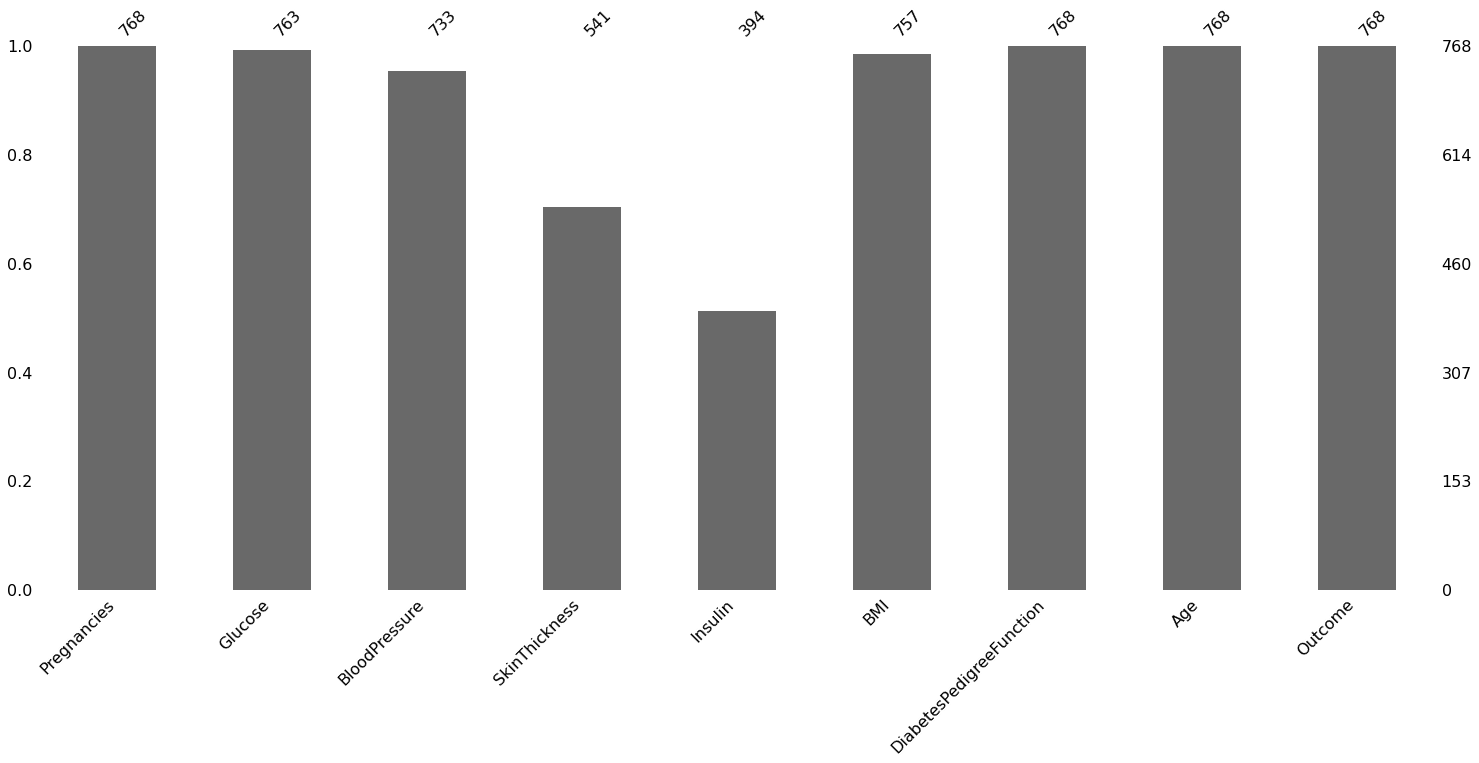

In [18]:
# visualizando valores faltantes com gráfico de barras
msno.bar(diabetes_copy);

In [19]:
# bibliotecas para visualização gráfica
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

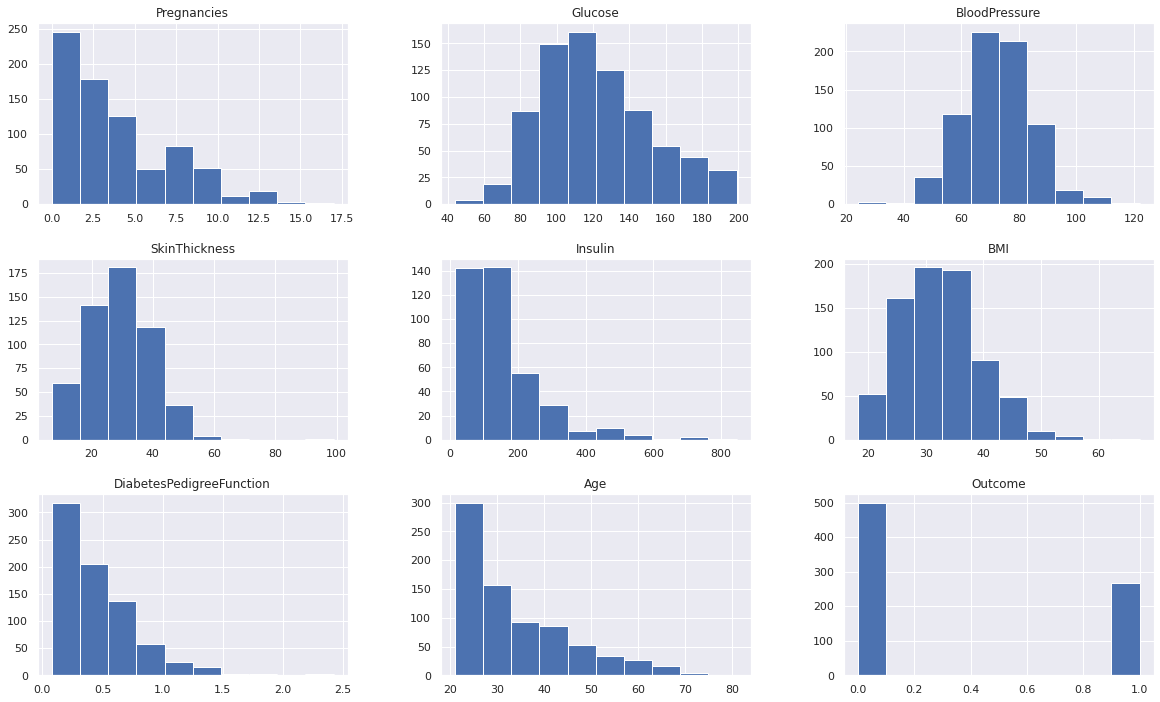

In [20]:
# visualização da distribuição dos dados com gráfico de histograma
diabetes_copy.hist(figsize=(20,12));

> Aqui vemos a distribuição de cada recurso, seja dados dependentes ou dados independentes.

**Por que precisamos ver a distribuição de dados?**

A resposta é simples, é a melhor maneira de iniciar a análise do conjunto de dados, pois `mostra a ocorrência de todo tipo de valor na estrutura gráfica` que, por sua vez, nos permite conhecer o intervalo dos dados.

Agora iremos imputar valores para cada valor ausente de cada atributo em particular.

In [21]:
# aplicando a média nos valores "NaN" do atributo "Glucose"
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace=True) 

# aplicando a média nos valores "NaN" do atributo "BloodPressure"
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace=True) 

# aplicando a mediana nos valores "NaN" do atributo "SkinThickness"
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace=True) 

# aplicando a mediana nos valores "NaN" do atributo "Insulin"
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace=True) 

# aplicando a mediana nos valores "NaN" do atributo "'BMI"
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace=True)

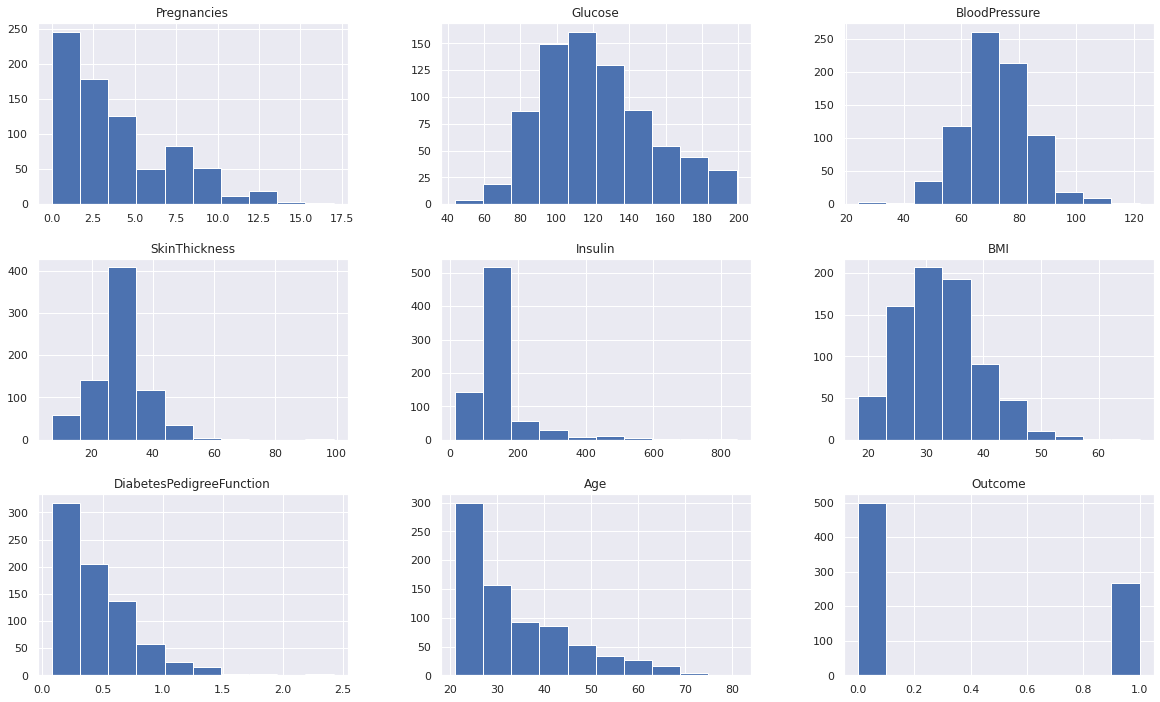

In [22]:
# visualização da distribuição dos dados com gráfico de histograma após tratamento dos valores "NaN's"
diabetes_copy.hist(figsize=(20,12));

In [23]:
# verificando se há valores nulos com a função ".any()"
diabetes_copy.isnull().sum().any()  # temos como resposta um valor boleano

False

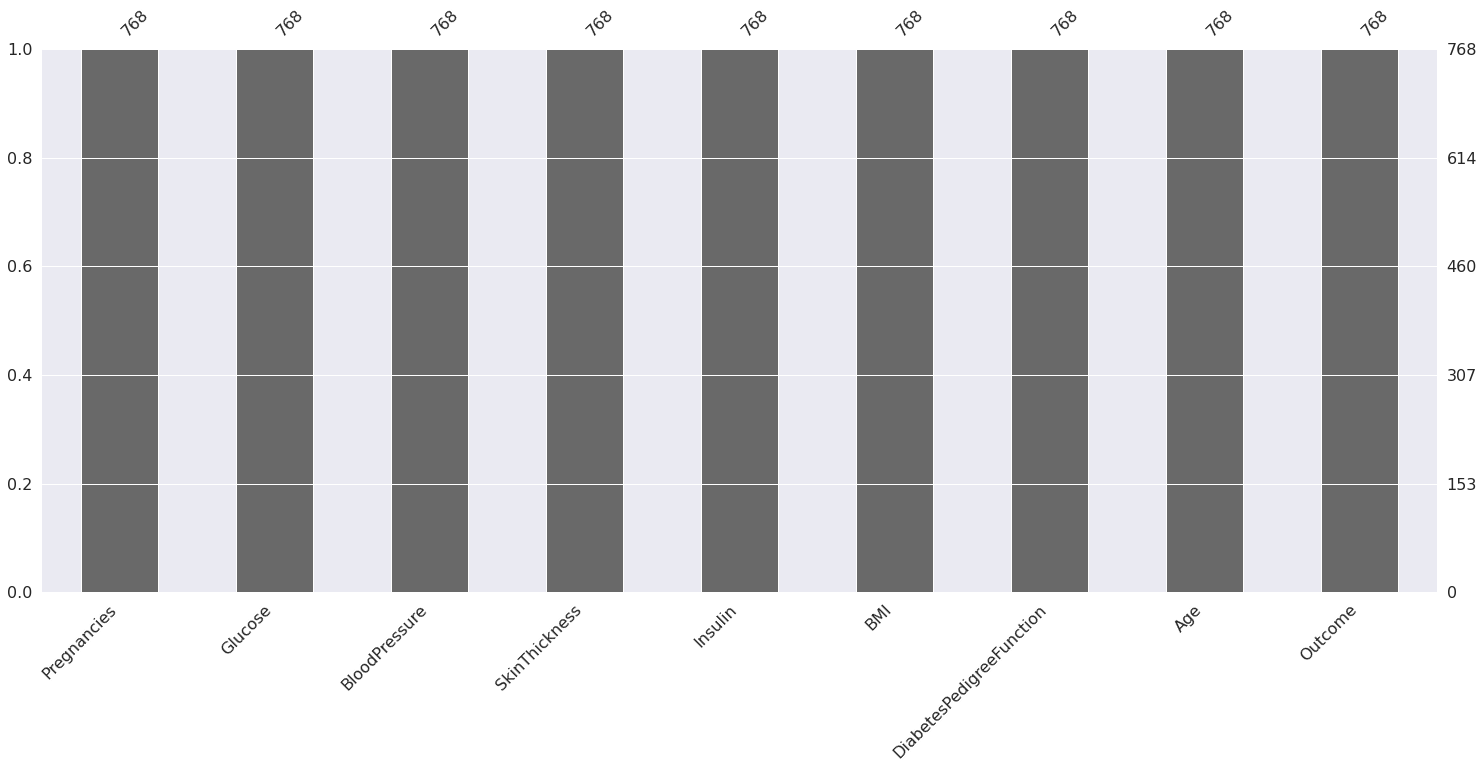

In [24]:
# visualização gráfica de valores faltantes
msno.bar(diabetes_copy);

> Podemos ver claramente que **não há valores nulos e/ou faltantes** no conjunto de dados.

0    500
1    268
Name: Outcome, dtype: int64



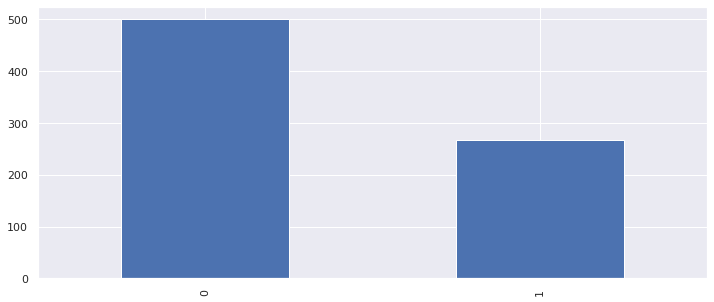

In [25]:
# visualizando a dsitribuição dos dados da variável alvo
color_wheel = {1: '#0392cf', 2: '#7bc043'} 
colors = diabetes_copy['Outcome'].map(lambda x: color_wheel.get(x + 1)) 

print(diabetes_copy.Outcome.value_counts()) 
print('')
diabetes_copy.Outcome.value_counts().plot(kind='bar', figsize=(12,5));

> É claramente visível que nosso `conjunto de dados está completamente desbalanceado`, de fato, _o número de pacientes diabéticos é praticamente metade dos pacientes não diabéticos_.

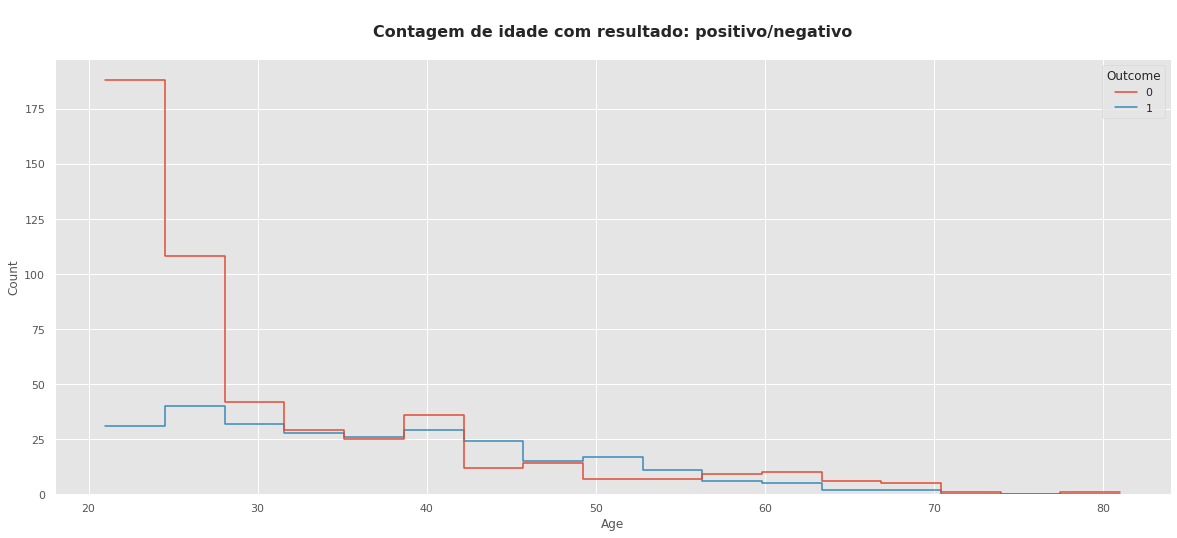

In [206]:
plt.figure(figsize=(20,8))

plt.title('\nContagem de idade com resultado: positivo/negativo\n', 
          {'fontsize': 16,'fontweight': 'bold'})
sns.histplot(data=diabetes, x='Age', hue='Outcome', element= 'step', fill=False);

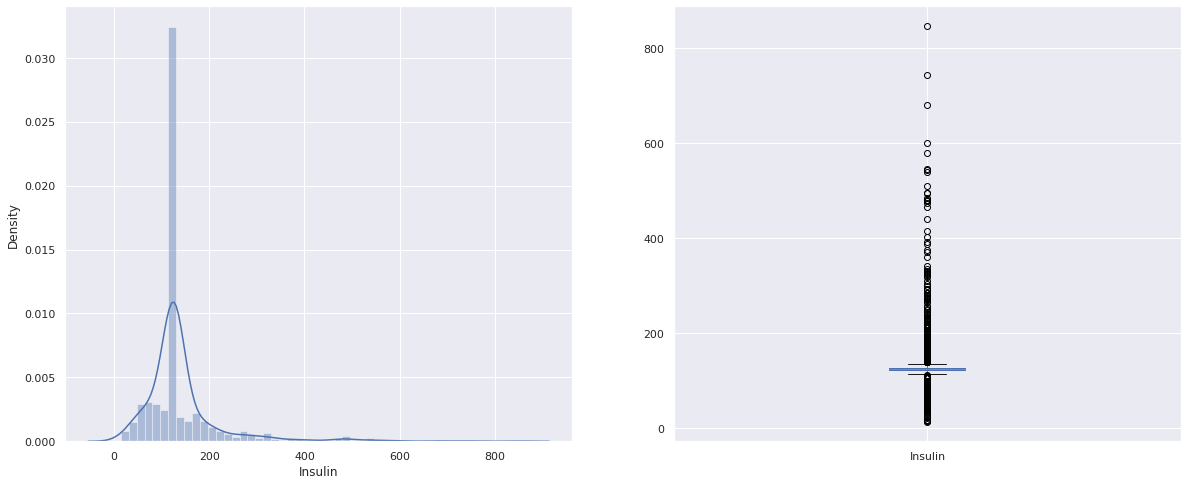

In [26]:
# distribuição dos dados do atributo "Insulin" e se há valores outliers
plt.subplot(121), sns.distplot(diabetes_copy['Insulin']) 
plt.subplot(122), diabetes_copy['Insulin'].plot.box(figsize=(20,8)) 
plt.show();

> O `distplot` pode ser muito útil para vermos a distribuição dos dados, bem como com a ajuda do `boxplot`, podemos ver se há **outliers** no atributo de interesse e outras informações também que podem ser derivadas dos gráficos.

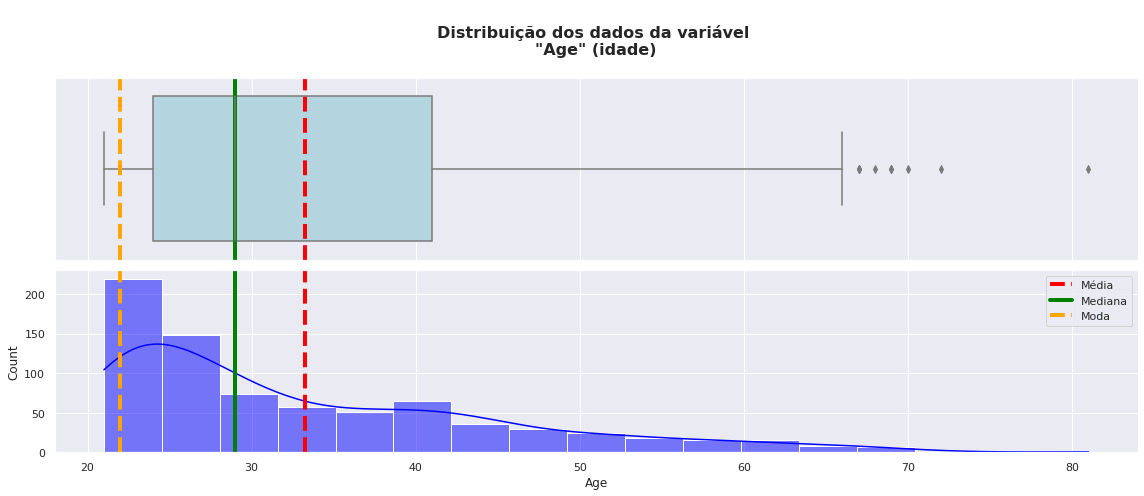

In [27]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Age" (idade)
mean = diabetes_copy['Age'].mean()
median = diabetes_copy['Age'].median()
mode = diabetes_copy['Age'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(16,7))

sns.boxplot(data=diabetes_copy, x='Age', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável \n"Age" (idade)\n',
                 {'fontsize': 16,'fontweight': 'bold'})

sns.histplot(data=diabetes_copy, x='Age', ax=ax_hist, kde=True, color='blue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

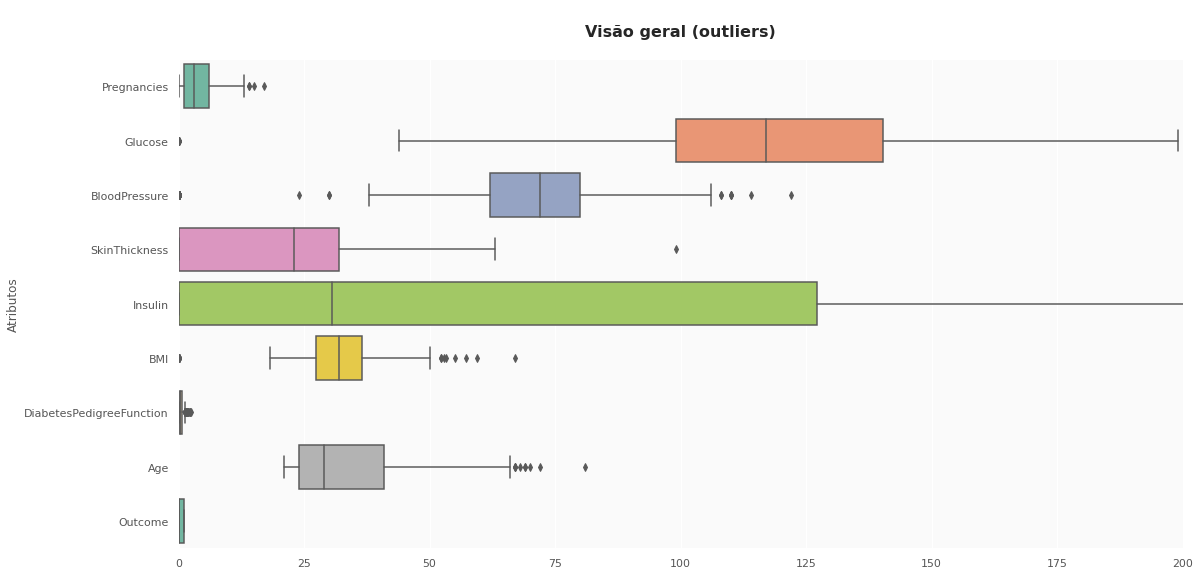

In [199]:
# usando o estilo ggplot2
plt.style.use('ggplot')  

f, ax = plt.subplots(figsize=(18, 9))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))

plt.ylabel('Atributos')
plt.title('\nVisão geral (outliers)\n',
          {'fontsize': 16,'fontweight': 'bold'})

ax = sns.boxplot(data = diabetes, 
  orient='h', 
  palette='Set2')

**Correlação entre todos os recursos.**

O `seaborn` tem um método fácil de mostrar o mapa de calor, atráves da função ".heatmap()`.

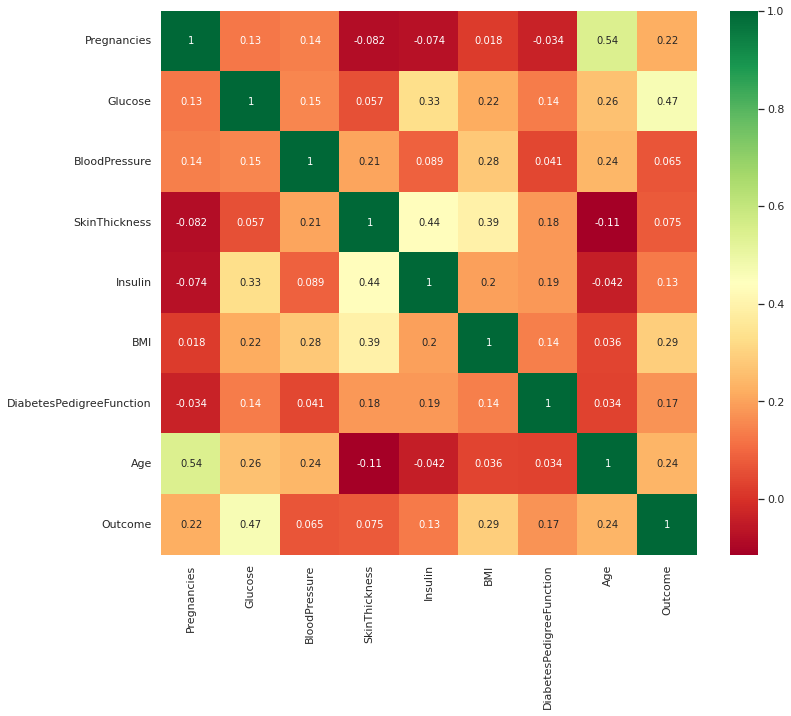

In [28]:
# correlação entre todos os recursos antes da inputação dos valores 
plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(), 
            annot=True, cmap ='RdYlGn');

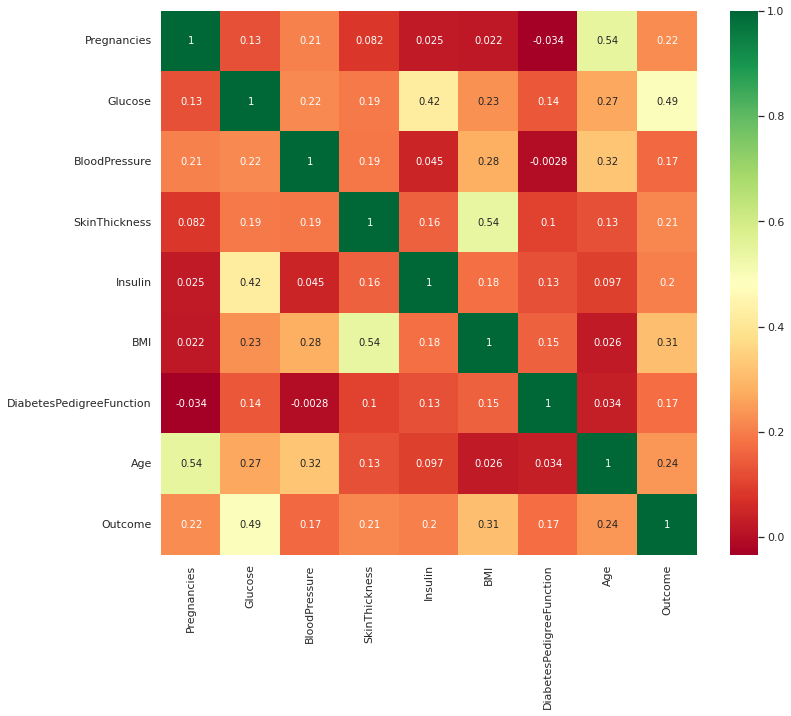

In [29]:
# correlação entre todos os recursos depois da inputação dos valores
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_copy.corr(), 
            annot=True, cmap ='RdYlGn');

Agora iremos dividir o conjunto de dados em duas partes, sendo:
- uma parte para modelagem, validação e avalição dos modelos e,
- outra parte para teste final do modelo escolhido.



In [33]:
# dados para modelagem
data_modeling = diabetes_copy.sample(frac=0.8, random_state=42)

# dados para teste
data_test = diabetes_copy.drop(data_modeling.index)

# resetando os índices dos conjuntos de dados - modelagem e teste
data_modeling.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

# visualizando a dimensão dos conjuntos de dados
print('Dados para modelagem:' + str(data_modeling.shape))
print('Dados para teste do modelo:' + str(data_test.shape))

Dados para modelagem:(614, 9)
Dados para teste do modelo:(154, 9)


> E partir desse momento realizaremos todas as demais etapas no objeto `data_modeling`.

In [34]:
# visualizando 5 primeiras linhas do conjunto de dados para modelagem
data_modeling.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,125.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,125.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,125.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,125.0,29.9,0.210,50,0


In [35]:
# visualizando 5 primeiras linhas do conjunto de dados para teste
data_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
3,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
4,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


## **Tratamento e preparação dos dados**

**Escalando os dados**

In [36]:
# função para escalar os dados
from sklearn.preprocessing import StandardScaler

In [37]:
# instanciando a função no objeto "scaler"
scaler = StandardScaler()

In [38]:
# separando as variáveis para realizar o escalamento dos dados
feats = list(data_modeling.columns[:-1])    # excluindo o atributo alvo

# visualizando os atributos selecionados
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [39]:
# data_scaled = pd.DataFrame(scaler.fit_transform(diabetes_copy.drop(['Outcome'], axis=1),), 
#                            columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
#                                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [40]:
# aplicando o objeto "scaler" e realizando o escalemento dos dados
data_scaled = pd.DataFrame(scaler.fit_transform(data_modeling.drop(['Outcome'], axis=1),), 
                           columns=feats)

In [41]:
# visualizando 5 amostras aleatórias dos dados escalados
data_scaled.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
199,-0.239993,1.602961,-0.712700,0.886078,0.946233,0.288978,-0.340785,-0.275759
14,-0.536483,-1.093774,-1.212282,-0.355019,-1.445838,-0.596080,0.905663,-0.951333
415,0.945967,2.162040,-1.878392,0.434770,2.857601,0.201923,1.088070,0.062029
132,-0.832973,-0.403147,-1.045755,-2.385904,0.454085,-1.031355,1.455924,-1.035780
314,-0.832973,-0.008503,0.452993,1.111732,-0.782010,0.941890,-0.629596,-0.444652


> Podemos ver que todos os valores agora estão na mesma escala, o que ajudará nosso modelo de _Machine Learning_ a fornecer um resultado melhor.

In [42]:
# novamente visualizando a distribuição dos dados da variável alvo
print(
    diabetes_copy['Outcome'].value_counts(),
    round(diabetes_copy['Outcome'].value_counts(normalize=True),4) * 100,
    sep='\n\n'
)

0    500
1    268
Name: Outcome, dtype: int64

0    65.1
1    34.9
Name: Outcome, dtype: float64


In [43]:
# instanciando as variáveis explicativas (X) e a resposta(y)
X = data_scaled
y = data_modeling['Outcome']

In [44]:
# visualizando os 10 primeiros dados das variáveis X e y
display(
    'X:',
    X.head(10),
    'y:',
    np.array(y.head(10))
)

'X:'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.649477,-0.764904,-1.212282,0.434770,0.545647,0.216432,-0.115817,0.822050
1,-0.536483,-0.304486,0.203201,0.321943,-0.198299,0.463088,-0.973130,-1.035780
2,-0.536483,-0.436034,-0.712700,-0.016538,-0.198299,-0.247861,-0.942728,-1.035780
3,1.242458,-0.468921,0.619520,-0.016538,-0.198299,-1.147428,1.179273,0.062029
4,0.945967,0.484802,1.452158,-0.016538,-0.198299,-0.378443,-0.784642,1.413178
5,0.649477,-0.600469,-0.046590,0.321943,0.545647,0.753271,-0.438069,1.835412
6,-0.832973,-1.652853,-2.044920,-1.257635,-0.759119,-1.756812,-0.441109,-0.951333
7,-1.129463,-0.140051,-0.012853,-0.016538,-0.198299,0.187414,1.410322,0.906497
8,0.056497,1.076769,-0.046590,-0.016538,-0.186853,-0.175315,-0.395507,0.315369
9,0.352987,0.846560,0.452993,-0.016538,-0.198299,0.172905,-0.760321,2.679880


'y:'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Agora vamos dividir os dados em dados de _treinamento e validação_ usando a função `train_test_split` do módulo **model_selection** da biblioteca do scikit-learn.

In [45]:
# importando a função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [50]:
# instanciando os dados de treino e validação e, reservando 80% do total para treino
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  train_size=0.8, random_state=42)

In [51]:
# quantidade de dados por variável
len(X_train), len(X_val), len(y_train), len(y_val)

(491, 123, 491, 123)

## **Aplicação dos modelos**

**Random Forest (floresta aleatória)**

In [52]:
# importando a função
from sklearn.ensemble import RandomForestClassifier

In [57]:
# instanciando o classificador
rfc_model = RandomForestClassifier(n_estimators=2_500, #class_weight='balanced_subsample', 
                                   n_jobs=-1, random_state=42, max_depth=10)

In [58]:
# realizando o treinamento do modelo com os dados de treino
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=2500, n_jobs=-1,
                       random_state=42)

In [59]:
# realizando as predições com o modelo após seu treinamento
rfc_train = rfc_model.predict(X_train)

# visualizando as 20 primeiras predições
rfc_train[:20]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [60]:
# importando função para avaliar acurácia do modelo
from sklearn.metrics import accuracy_score

In [61]:
# acurácia do modelo nos dados de treino
print(f'Acurácia (dados de treino): {accuracy_score(y_train, rfc_train):.3f}')

Acurácia (dados de treino): 0.994


> Podemos ver que no conjunto de dados de treinamento nosso modelo está `superajustado`.

Agora vamos avaliar o modelo nos dados de validação.

In [62]:
# realizando as predições
rfc_predictions = rfc_model.predict(X_val)

#  visualizando as 20 primeiras predições
rfc_predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [63]:
# avaliando o resultado do modelo com os dados de validação
# print(f'Acurácia (dados de validação): {accuracy_score(y_val, rfc_predictions):.2f}')
acc_rfc_model = accuracy_score(y_val, rfc_predictions)
print(f'Acurácia (dados de treino): {acc_rfc_model:.3f}')

Acurácia (dados de treino): 0.764


In [64]:
# importando as funções para gerar o relatório e a matriz de confusão do modelo
from sklearn.metrics import classification_report, confusion_matrix

Matriz de confusão: 
[[62 10]
 [19 32]]

Relatório: 
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        72
           1       0.76      0.63      0.69        51

    accuracy                           0.76       123
   macro avg       0.76      0.74      0.75       123
weighted avg       0.76      0.76      0.76       123



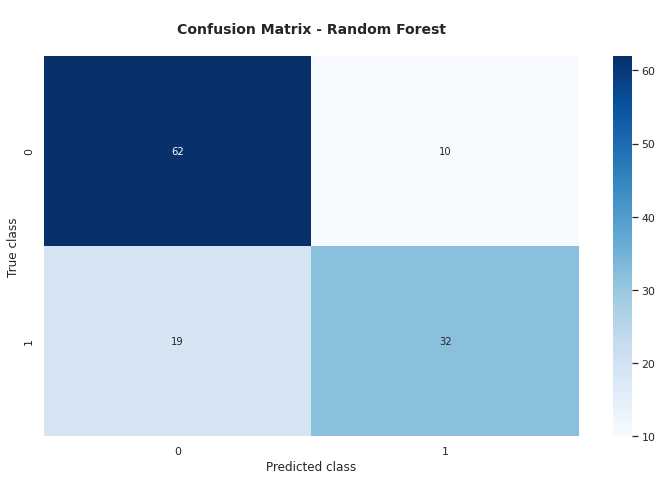

In [65]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, rfc_predictions)}',
    f'Relatório: \n{classification_report(y_val, rfc_predictions)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
rfc_predictions = rfc_model.predict(X_val)
rfc_cm = confusion_matrix(y_val, rfc_predictions)

plt.figure(figsize=(12,7))
sns.heatmap(rfc_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('\nConfusion Matrix - Random Forest\n', 
          {'fontsize': 14,'fontweight': 'bold'});

**Decision Tree (árvore de decisão)**

In [66]:
# importando a função
from sklearn.tree import DecisionTreeClassifier

In [67]:
# instanciando o classificador
dtc_model = DecisionTreeClassifier(max_depth=10, random_state=42)

In [68]:
# realizando o treinamento do modelo classificador com os dados de treino
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [69]:
# realizando as predições e avaliando o resultado do modelo com os dados de validação
dtc_predictions = dtc_model.predict(X_val)
# print(f'Acurácia (dados de validação): {accuracy_score(y_val, dtc_predictions):.2f}')
acc_dtc_model = accuracy_score(y_val, dtc_predictions)
print(f'Acurácia (dados de treino): {acc_dtc_model:.3f}')

Acurácia (dados de treino): 0.715


Matriz de confusão: 
[[54 18]
 [17 34]]

Relatório: 
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        72
           1       0.65      0.67      0.66        51

    accuracy                           0.72       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.72      0.72      0.72       123



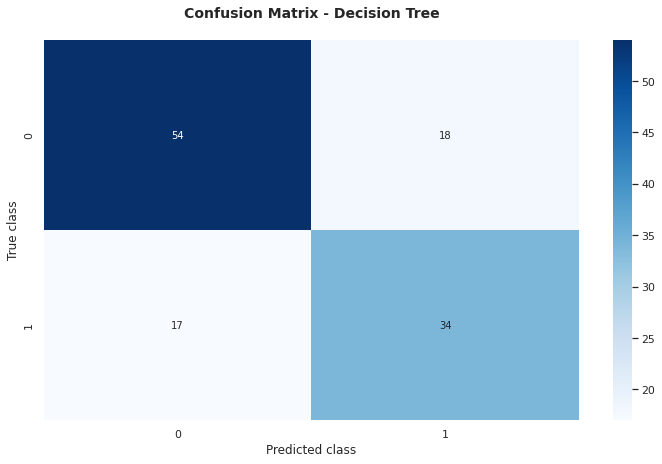

In [70]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, dtc_predictions)}',
    f'Relatório: \n{classification_report(y_val, dtc_predictions)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
dtc_predictions = dtc_model.predict(X_val)
dtc_cm = confusion_matrix(y_val, dtc_predictions)

plt.figure(figsize=(12,7))
sns.heatmap(dtc_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix - Decision Tree\n', 
          {'fontsize': 14,'fontweight': 'bold'});

**XGBoost classifier**

In [71]:
# importando a função de classificação
from xgboost import XGBClassifier

In [72]:
# instanciando o classificador
xgb_model = XGBClassifier(n_estimators=2_000, learning_rate=0.09, gamma=1, n_jobs=-1, random_state=42)

In [73]:
# treinando o classificador
xgb_model.fit(X_train, y_train)

XGBClassifier(gamma=1, learning_rate=0.09, n_estimators=2000, n_jobs=-1,
              random_state=42)

In [74]:
# realizando e visualizando as 20 primeiras predições
xgb_predictions = xgb_model.predict(X_val)
xgb_predictions[:20]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [75]:
# avaliando acurácia do modelo com os dados de validação
# print(f'Acurácia (dados de validação): {accuracy_score(y_val, xgb_predictions):.2f}')
acc_xgb_model = accuracy_score(y_val, xgb_predictions)
print(f'Acurácia (dados de treino): {acc_xgb_model:.3f}')

Acurácia (dados de treino): 0.732


Matriz de confusão: 
[[58 14]
 [19 32]]

Relatório: 
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        72
           1       0.70      0.63      0.66        51

    accuracy                           0.73       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.73      0.73      0.73       123



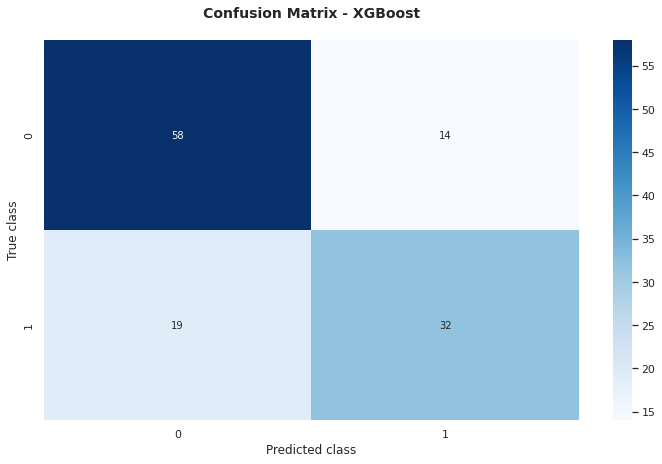

In [76]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, xgb_predictions)}',
    f'Relatório: \n{classification_report(y_val, xgb_predictions)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
xgb_predictions = xgb_model.predict(X_val)
xgb_cm = confusion_matrix(y_val, xgb_predictions)

plt.figure(figsize=(12,7))
sns.heatmap(xgb_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix - XGBoost\n', 
          {'fontsize': 14,'fontweight': 'bold'});

**Support Vector Machine (SVM)**

In [77]:
# importando a função
from sklearn.svm import SVC

In [78]:
# instanciando o modelo de classificação
svc_model = SVC(random_state=42)

In [79]:
# treinando o modelo
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [80]:
# realizando as predições e visulaizando as 20 primeiras
svc_predictions = svc_model.predict(X_val)
svc_predictions[:20]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [81]:
# avaliando acurácia do modelo com os dados de validação
# print(f'Acurácia (dados de validação): {accuracy_score(y_val, svc_predictions):.2f}')
acc_svc_model = accuracy_score(y_val, svc_predictions)
print(f'Acurácia (dados de treino): {acc_svc_model:.3f}')

Acurácia (dados de treino): 0.707


Matriz de confusão: 
[[63  9]
 [27 24]]

Relatório: 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        72
           1       0.73      0.47      0.57        51

    accuracy                           0.71       123
   macro avg       0.71      0.67      0.67       123
weighted avg       0.71      0.71      0.69       123



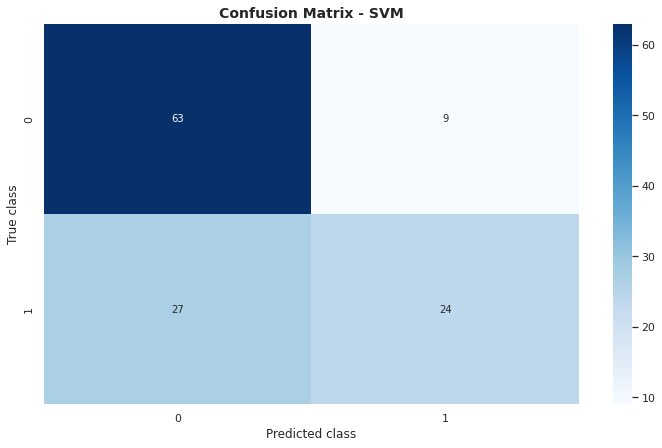

In [82]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, svc_predictions)}',
    f'Relatório: \n{classification_report(y_val, svc_predictions)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
svc_predictions = svc_model.predict(X_val)
svc_cm = confusion_matrix(y_val, svc_predictions)

plt.figure(figsize=(12,7))
sns.heatmap(svc_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix - SVM', 
          {'fontsize': 14,'fontweight': 'bold'});

**KNN**

In [83]:
# importando a função
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# instanciando o modelo de classificação
knn_model = KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [85]:
# treinando o modelo
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [86]:
# realizando as predições e visulaizando as 20 primeiras
knn_predictions = knn_model.predict(X_val)
knn_predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [87]:
# avaliando acurácia do modelo com os dados de validação
# print(f'Acurácia (dados de validação): {accuracy_score(y_val, knn_predictions):.2f}')
acc_knn_model = accuracy_score(y_val, knn_predictions)
print(f'Acurácia (dados de treino): {acc_knn_model:.3f}')

Acurácia (dados de treino): 0.715


Matriz de confusão: 
[[67  5]
 [30 21]]

Relatório: 
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        72
           1       0.81      0.41      0.55        51

    accuracy                           0.72       123
   macro avg       0.75      0.67      0.67       123
weighted avg       0.74      0.72      0.69       123



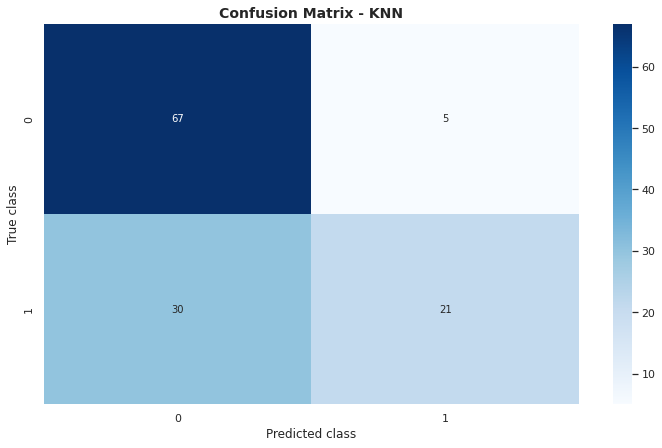

In [88]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, knn_predictions)}',
    f'Relatório: \n{classification_report(y_val, knn_predictions)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
knn_predictions = knn_model.predict(X_val)
knn_cm = confusion_matrix(y_val, knn_predictions)

plt.figure(figsize=(12,7))
sns.heatmap(knn_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix - KNN', 
          {'fontsize': 14,'fontweight': 'bold'});

**Naive Bayes**

In [89]:
# importando a função
from sklearn.naive_bayes import GaussianNB

In [90]:
# instanciando o modelo de classificação
gNB_model = GaussianNB()

In [91]:
# treinando o modelo
gNB_model.fit(X_train, y_train)

GaussianNB()

In [92]:
# realizando as predições e visulaizando as 20 primeiras
gNB_predictions = gNB_model.predict(X_val)
gNB_predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [93]:
# avaliando acurácia do modelo com os dados de validação
# print(f'Acurácia (dados de validação): {accuracy_score(y_val, gNB_predictions):.2f}')
acc_gNB_model = accuracy_score(y_val, gNB_predictions)
print(f'Acurácia (dados de treino): {acc_gNB_model:.3f}')

Acurácia (dados de treino): 0.748


Matriz de confusão: 
[[60 12]
 [19 32]]

Relatório: 
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        72
           1       0.73      0.63      0.67        51

    accuracy                           0.75       123
   macro avg       0.74      0.73      0.73       123
weighted avg       0.75      0.75      0.74       123



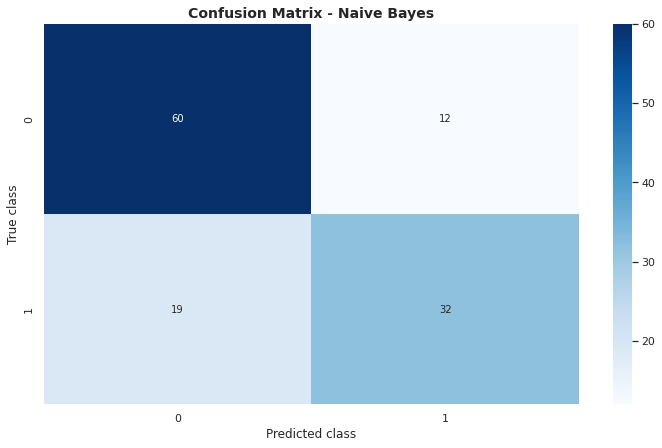

In [94]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, gNB_predictions)}',
    f'Relatório: \n{classification_report(y_val, gNB_predictions)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
gNB_predictions = gNB_model.predict(X_val)
gNB_cm = confusion_matrix(y_val, gNB_predictions)

plt.figure(figsize=(12,7))
sns.heatmap(gNB_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix - Naive Bayes', 
          {'fontsize': 14,'fontweight': 'bold'});

## **Avaliação final**

In [95]:
print(
    '\tACURÁCIA\n'
    f'Randon Forest: {acc_rfc_model:.3f}',
    f'Decision Tree: {acc_dtc_model:.3f}',
    f'XGBoost: {acc_xgb_model:.3f}',
    f'SVM: {acc_svc_model:.3f}',
    f'KNN: {acc_knn_model:.3f}',
    f'Naive Bayes: {acc_gNB_model:.3f}',
    sep='\n'
)

	ACURÁCIA
Randon Forest: 0.764
Decision Tree: 0.715
XGBoost: 0.732
SVM: 0.707
KNN: 0.715
Naive Bayes: 0.748


> O modelos `Random Forest` apresentou o mesmo valor de _acurácia_, uma **accuracy_score** de 0,764.

Portanto, esse será o nosso modelo final.

## **Importância do recurso**

Conhecer a importância do recurso é bastante necessário, pois mostra quanto peso cada recurso fornece na fase de construção do modelo.

In [97]:
# obtendo a importância dos recursos 
rfc_model.feature_importances_

array([0.08409963, 0.26878334, 0.08046127, 0.06822249, 0.08083467,
       0.1600087 , 0.12307895, 0.13451094])

> A partir da saída acima, não fica muito claro qual recurso é importante, por isso `faremos uma visualização` para facilitar a interpretabilidade.

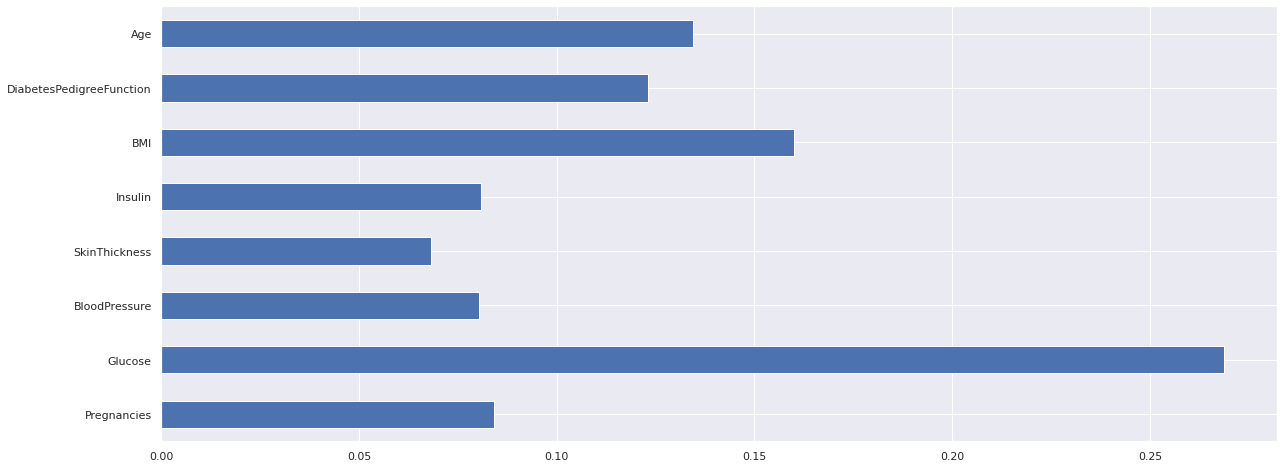

In [98]:
pd.Series(rfc_model.feature_importances_, index=X.columns).plot(kind='barh', figsize=(20,8));

In [99]:
# instanciando as features de maior importância para a predição do nosso target
feats = pd.Series(rfc_model.feature_importances_, index = X_train.columns)

In [100]:
# ordenando do maior para o menor
feats.sort_values(inplace=True)

In [101]:
# imprimindo as features de maior importância
feats.sort_values()*100

SkinThickness                6.822249
BloodPressure                8.046127
Insulin                      8.083467
Pregnancies                  8.409963
DiabetesPedigreeFunction    12.307895
Age                         13.451094
BMI                         16.000870
Glucose                     26.878334
dtype: float64

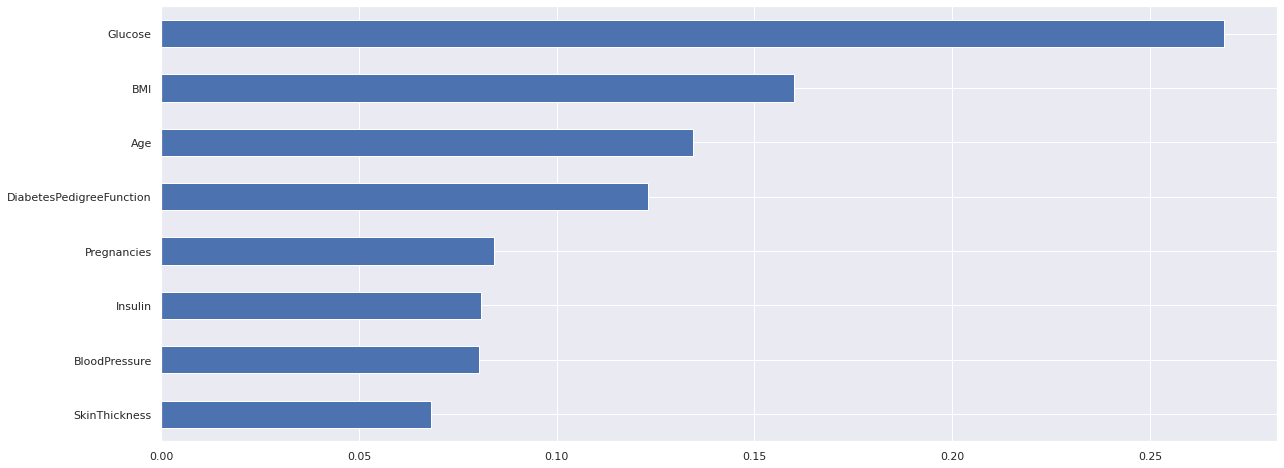

In [102]:
# visualizando de forma gráfica com auxílio do gráfico de barras as features de maior importância
feats.plot(kind='barh', figsize=(20,8));

> É visível que a glicose como recurso é o mais importante neste conjunto de dados.

In [103]:
# visualizando a porcentagem de "explicação" para a variável alvo
pd.DataFrame(feats.sort_values()*100, columns=['Percentual de explicação']).tail()

,Percentual de explicação
Pregnancies,8.409963
DiabetesPedigreeFunction,12.307895
Age,13.451094
BMI,16.000870
Glucose,26.878334


In [104]:
# imprimindo as probabilidades das predições dos dados de validação
print('Prediction Probabilities')
rfc_model.predict_proba(X_val)[:20] * 100   # 20 primeiras predições

Prediction Probabilities


array([[68.64656808, 31.35343192],
       [56.53529699, 43.46470301],
       [99.25937425,  0.74062575],
       [88.47177945, 11.52822055],
       [94.64866595,  5.35133405],
       [61.10042331, 38.89957669],
       [23.60151242, 76.39848758],
       [90.43705814,  9.56294186],
       [68.48836629, 31.51163371],
       [85.82578596, 14.17421404],
       [49.52537992, 50.47462008],
       [85.32836967, 14.67163033],
       [27.90611549, 72.09388451],
       [26.20213518, 73.79786482],
       [24.33951116, 75.66048884],
       [67.72468063, 32.27531937],
       [16.75488067, 83.24511933],
       [91.83074225,  8.16925775],
       [59.17289758, 40.82710242],
       [65.14166208, 34.85833792]])

In [109]:
# biblioteca para salvar serializado o modelo
import pickle as pk

In [111]:
# salvando o modelo "rfc_model"
saved_model = pk.dumps(rfc_model)

In [112]:
# carregando aquele o salvo 
rfc_from_pickle = pk.loads(saved_model)

# após carregar aquele modelo, usaremos isso para fazer previsões
rfc_from_pickle.predict(X_val)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

**Agora iremos utilizar o modelo final para realizar a predição com um dado aleatório dos dados de teste.**

In [132]:
data_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
3,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
4,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
...,...,...,...,...,...,...,...,...,...
149,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0
150,4,136.0,70.0,29.0,125.0,31.2,1.182,22,1
151,7,137.0,90.0,41.0,125.0,32.0,0.391,39,0
152,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1


In [189]:
# sorteando um dado aleatório do "data_test"
test = data_test.sample(1)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
127,11,138.0,74.0,26.0,144.0,36.1,0.557,50,1


In [175]:
# excluindo o dado da variável "Outcome" e transformando os dados em um vetor (array)
test = test.drop('Outcome', axis=1).values
test

array([[  9.   , 123.   ,  70.   ,  44.   ,  94.   ,  33.1  ,   0.374,
         40.   ]])

In [176]:
# realizando a predição com o modelo
rfc_model.predict(test)

array([1])

In [161]:
# test = np.array(data_test.drop('Outcome', axis=1).sample(1))
# test

In [162]:
# rfc_model.predict(test)

In [177]:
# salvar o modelo Random Forest (rfc_model) no arquivo sale_rfc.pkl
with open('sale_rfc.pkl', 'wb') as file:
    # pickle.dump(rfc_model, file)
    pk.dump(rfc_model, file)

In [178]:
# carregando o modelo
with open('sale_rfc.pkl', 'rb') as f:
    # model = pickle.load(f)
    model = pk.load(f)

In [179]:
# visualizando os argumentos do modelo
model

RandomForestClassifier(max_depth=10, n_estimators=2500, n_jobs=-1,
                       random_state=42)

In [181]:
# biblioteca para salvar serializado o modelo
import joblib as jl

In [182]:
# instanciando o modelo no objeto "model.pkl"
jl.dump(rfc_model, 'model.pkl')

['model.pkl']

In [183]:
# visualizando o diretório principal
!ls

diabetes.csv	diabetes.csv.2	sale_rfc.pkl	  sample_data
diabetes.csv.1	model.pkl	sale_xgboost.pkl


In [184]:
# instanciando o modelo no objeto "model"
model = jl.load('model.pkl')
model   # visualizando o modelo

RandomForestClassifier(max_depth=10, n_estimators=2500, n_jobs=-1,
                       random_state=42)

In [185]:
# print('Atributos do Modelo \nClasses: {}\nEstimators: {}\nParametros: {}'.format(model.classes_, model.n_estimators, model.base_estimator))

In [186]:
# sorteando um dado aleatório do "data_test"
test = data_test.sample(1)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
54,2,90.0,80.0,14.0,55.0,24.4,0.249,24,0


In [187]:
# excluindo o dado do atributo "Outcome" e transformando os dados em um vetor (array)
test = test.drop('Outcome', axis=1).values
test

array([[ 2.   , 90.   , 80.   , 14.   , 55.   , 24.4  ,  0.249, 24.   ]])

In [188]:
# realizando a predição com o modelo
model.predict(test)

array([1])

## **Material de consulta**

- [Entendendo o que é Matriz de Confusão com Python](https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509)

- [Scikit-learn](https://scikit-learn.org/stable/index.html)